<h2>Load and plot a T-28 NetCDF file</h2><br>
<i>Files can be found [here](http://data.eol.ucar.edu/master_list/?project=T-28)
<br>
They follow RAF nimbus conventions</i>

In [1]:
# Load the needed packages
import numpy as np
import matplotlib.pyplot as plt

import awot
from awot.graph.common import create_basemap
from awot.graph import FlightLevel

%matplotlib inline

Supply user information

In [2]:
# Set the path for data file
flname="/Users/guy/data/t28/jpole/T28_JPOLE2003_800.nc"

<li>Set up some characteristics for plotting. 
<li>Use Cylindrical Equidistant Area map projection.
<li>Set the spacing of the barbs and X-axis time step for labels.
<li>Set the start and end times for subsetting.

In [32]:
proj = 'cea'
Wbarb_Spacing = 300 # Spacing of wind barbs along flight path (sec)

# Choose the X-axis time step (in seconds) where major labels will be
XlabStride = 3600

# Should landmarks be plotted? [If yes, then modify the section below
Lmarks=False

# Optional variables that can be included with AWOT
# Start and end times for track in Datetime instance format
#start_time = "2003-08-06 00:00:00"
#end_time = "2003-08-06 23:50:00"

corners = [-96., 34., -98., 36.,]

Read in flight data<br>
NOTE: At time or writing this it is required that the ```time_var``` argument be provided to make the read function work properly. This may change in the future, but time variables are not standard even among RAF Nimbus guidelines.

In [3]:
fl = awot.io.read_netcdf(fname=flname, platform='t28', time_var="Time")

Using 'Time' to make AWOT time variable


In [13]:
fl.keys()

['GPS_MAGNETIC_DEVIATION',
 'FIELD_METER_TOP',
 'LWC_DMT',
 'ACCELERATION_Z',
 'EX_EARTH',
 'pressure_altitude',
 'ACCELERATION_VERTICAL',
 'HAIL_LIQUID_WATER_MIXING_RATIO',
 'FSSP_EQUIVALENT_DIAMETER_VARIANCE',
 'UPDRAFT',
 'DENSITY_AIR',
 'time',
 'flight_number',
 'platform',
 'Uwind',
 'pitch',
 'EQ_AIRCRAFT_CHARGE',
 'HAIL_TOTAL_COUNTS',
 'TIME_GPS_DECIMAL',
 'HAIL_WATER',
 'PMS_END_ELEMENT_2',
 'PMS_END_ELEMENT_1',
 'FSSP_TOTAL_COUNTS',
 'tas',
 'ACCELERATION_Y',
 'HAIL_AVERAGE_DIAMETER',
 'FIELD_METER_RIGHT',
 'altitude',
 'FSSP_EQUIVALENT_DIAMETER',
 'PRESSURE_DYNAMIC_2',
 'FIELD_METER_6',
 'FSSP_TOTAL_STROBES',
 'GPS_GROUNDSPEED',
 'FSSP_LIQUID_WATER',
 'MANIFOLD_PRESSURE',
 'EY_AIRCRAFT',
 'EX_AIRCRAFT',
 'latitude',
 'DZDT_POINT',
 'ACCELERATION_X',
 'ias',
 'VOLTAGE_REGULATOR',
 'EX_PATH',
 'FSSP_GATED_STROBES',
 'PRESSURE_STATIC_2',
 'Vwind',
 'PRESSURE_STATIC_1',
 'SHADOW_OR_PMS',
 'EY_EARTH',
 'NO_CONCENTRATION',
 'TEMPERATURE_ROSEMOUNT_SENSOR',
 'FSSP_ACTIVITY',
 'FSSP_

Create the track figure for this flight, there appear to be some bunk data values in lat/lon

In [34]:
print(fl['latitude']['data'].min(), fl['latitude']['data'].max())
fl['latitude']['data'][:] = np.ma.masked_equal(fl['latitude']['data'][:], 0.)
fl['longitude']['data'][:] = np.ma.masked_equal(fl['longitude']['data'][:], 0.)
print(fl['latitude']['data'].min(), fl['latitude']['data'].max())
print(fl['longitude']['data'].min(), fl['longitude']['data'].max())
print(fl['altitude']['data'].max())

(34.7575, 35.293167)
(34.7575, 35.293167)
(-97.715332, -96.65583)
4991.01


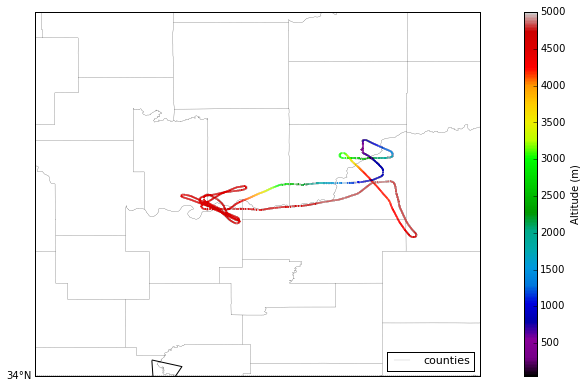

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Create the basemap
bm = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1.,ax=ax)
bm.drawcounties()
# Instantiate the Flight plotting routines
flp = FlightLevel(fl, basemap=bm)
flp.plot_trackmap(
#                 start_time=start_time, end_time=end_time,
                 color_by_altitude=True, track_cmap='spectral',
                 min_altitude=50., max_altitude= 5000.,
                 addlegend=True, addtitle=False)